# Homework 3

In [1]:
import pandas as pd
import numpy as np
import wget

In [2]:
data = wget.download('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

 47% [...................................                                       ]  704512 / 1475504

100% [..........................................................................] 1475504 / 1475504

In [3]:
df = pd.read_csv(data)

In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

## Data preparation

In [5]:
df = df[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style',
         'highway MPG','city mpg', 'MSRP']]

In [6]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [7]:
# Fill in the missing values of the selected features with 0.
df = df.fillna(0)

In [8]:
# Rename MSRP variable to price.
df.rename(columns = {'msrp':'price'}, inplace = True)

## Question 1

What is the most frequent observation (mode) for the column transmission_type?

In [9]:
df['transmission_type'].mode()

0    AUTOMATIC
dtype: object

Answer: AUTOMATIC

## Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

In [10]:
df.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

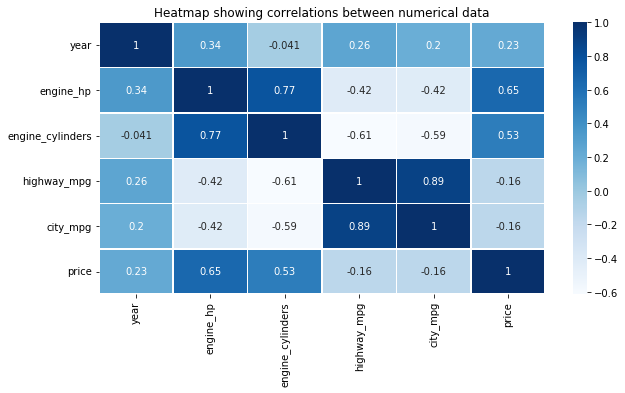

In [12]:
plt.figure(figsize=(10,5))  
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [13]:
df.corr().unstack().sort_values(ascending = False).head(10)

price             price               1.000000
city_mpg          city_mpg            1.000000
engine_hp         engine_hp           1.000000
engine_cylinders  engine_cylinders    1.000000
highway_mpg       highway_mpg         1.000000
year              year                1.000000
highway_mpg       city_mpg            0.886829
city_mpg          highway_mpg         0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
dtype: float64

Answer: highway_mpg and city_mpg

## Make price binary

* Now we need to turn the price variable from numeric into a binary format.  
* Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [14]:
dfp = df.copy()
df['above_average'] = (df['price'] > df['price'].mean()).astype(int)

In [15]:
del df['price']

In [16]:
dfp.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


## Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.  
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.  
* Make sure that the target value (above_average) is not in your dataframe.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [19]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [20]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [21]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [22]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [23]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [24]:
df_train_full.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'above_average'],
      dtype='object')

## Question 3

* Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.  
* Round the scores to 2 decimals using round(score, 2).  
Which of the variables has the lowest mutual information score?

In [25]:
df_train_full = df_train_full.reset_index(drop = True)

In [26]:
df_train_full.above_average.value_counts(normalize = True)

0    0.723219
1    0.276781
Name: above_average, dtype: float64

In [27]:
df_train_full.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int32
dtype: object

In [28]:
df_train_full.nunique()

make                  48
model                902
year                  28
engine_hp            349
engine_cylinders       9
transmission_type      5
vehicle_style         16
highway_mpg           58
city_mpg              66
above_average          2
dtype: int64

In [29]:
from sklearn.metrics import mutual_info_score

In [30]:
print('make:', round(mutual_info_score(df_train_full.above_average, df_train_full.make), 2))
print('model:', round(mutual_info_score(df_train_full.above_average, df_train_full.model), 2))
print('transmission_type:', round(mutual_info_score(df_train_full.above_average, df_train_full.transmission_type), 2))
print('vehicle_style:', round(mutual_info_score(df_train_full.above_average, df_train_full.vehicle_style), 2))

make: 0.24
model: 0.46
transmission_type: 0.02
vehicle_style: 0.08


Answer: transmission_type

## Question 4

* Now let's train a logistic regression.  
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.  
* Fit the model on the training dataset.  
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    * model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)  
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.  
What accuracy did you get?

#### One-hot encoding

In [31]:
from sklearn.feature_extraction import DictVectorizer

In [32]:
train_dict = df_train.to_dict(orient='records')

In [33]:
train_dict[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'highway_mpg': 19,
 'city_mpg': 15}

In [34]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)

In [35]:
X_train = dv.transform(train_dict)

In [36]:
X_train.shape

(7148, 943)

In [37]:
dv.get_feature_names()

['city_mpg',
 'engine_cylinders',
 'engine_hp',
 'highway_mpg',
 'make=Acura',
 'make=Alfa Romeo',
 'make=Aston Martin',
 'make=Audi',
 'make=BMW',
 'make=Bentley',
 'make=Bugatti',
 'make=Buick',
 'make=Cadillac',
 'make=Chevrolet',
 'make=Chrysler',
 'make=Dodge',
 'make=FIAT',
 'make=Ferrari',
 'make=Ford',
 'make=GMC',
 'make=Genesis',
 'make=HUMMER',
 'make=Honda',
 'make=Hyundai',
 'make=Infiniti',
 'make=Kia',
 'make=Lamborghini',
 'make=Land Rover',
 'make=Lexus',
 'make=Lincoln',
 'make=Lotus',
 'make=Maserati',
 'make=Maybach',
 'make=Mazda',
 'make=McLaren',
 'make=Mercedes-Benz',
 'make=Mitsubishi',
 'make=Nissan',
 'make=Oldsmobile',
 'make=Plymouth',
 'make=Pontiac',
 'make=Porsche',
 'make=Rolls-Royce',
 'make=Saab',
 'make=Scion',
 'make=Spyker',
 'make=Subaru',
 'make=Suzuki',
 'make=Tesla',
 'make=Toyota',
 'make=Volkswagen',
 'make=Volvo',
 'model=1 Series',
 'model=100',
 'model=124 Spider',
 'model=190-Class',
 'model=2',
 'model=2 Series',
 'model=200',
 'model=20

#### Training logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [41]:
model.predict_proba(X_val)

array([[9.99692966e-01, 3.07033780e-04],
       [2.27974745e-03, 9.97720253e-01],
       [9.99930206e-01, 6.97938861e-05],
       ...,
       [9.99898957e-01, 1.01043039e-04],
       [8.98629570e-03, 9.91013704e-01],
       [9.08719100e-03, 9.90912809e-01]])

In [42]:
y_pred = model.predict_proba(X_val)[:, 1]

In [43]:
y_pred

array([3.07033780e-04, 9.97720253e-01, 6.97938861e-05, ...,
       1.01043039e-04, 9.91013704e-01, 9.90912809e-01])

In [44]:
above_avg = y_pred > 0.5

In [45]:
(y_val == above_avg).mean().round(2)

0.95

In [46]:
accuracy = np.round(accuracy_score(y_val, above_avg),2)
print(accuracy)

0.95


#### Model interpretation

In [47]:
# a bias term
model.intercept_[0].round(3)

-0.549

In [48]:
# weights
model.coef_[0].round(3)

array([ 8.300e-02, -1.330e-01,  3.900e-02,  0.000e+00,  1.601e+00,
        2.188e+00,  7.620e-01,  3.249e+00,  2.858e+00,  2.130e-01,
        0.000e+00, -4.610e-01,  2.597e+00, -1.751e+00, -1.413e+00,
       -4.048e+00, -6.620e-01,  5.090e-01, -2.132e+00, -1.369e+00,
        8.890e-01, -3.550e-01, -1.347e+00, -2.693e+00,  3.290e-01,
       -1.526e+00,  1.500e-02,  2.173e+00,  1.507e+00,  1.224e+00,
        4.405e+00,  1.343e+00,  6.000e-03, -1.762e+00,  1.000e-03,
        9.090e-01, -2.414e+00, -1.314e+00, -1.753e+00, -6.450e-01,
       -3.691e+00,  1.956e+00,  1.274e+00,  7.200e-01, -3.000e-01,
        4.610e-01, -3.110e+00, -2.217e+00,  3.706e+00, -4.010e-01,
       -1.123e+00,  1.044e+00, -1.830e+00, -7.290e-01, -6.800e-02,
       -1.500e-02, -2.000e-03, -1.873e+00, -1.233e+00, -3.000e-03,
       -7.000e-03, -4.000e-03, -2.080e-01,  1.960e-01,  2.363e+00,
        7.270e-01, -6.570e-01, -6.900e-02, -2.310e-01, -2.810e-01,
       -0.000e+00, -2.300e-02, -1.136e+00,  2.050e-01,  6.000e

In [49]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'city_mpg': 0.083,
 'engine_cylinders': -0.133,
 'engine_hp': 0.039,
 'highway_mpg': 0.0,
 'make=Acura': 1.601,
 'make=Alfa Romeo': 2.188,
 'make=Aston Martin': 0.762,
 'make=Audi': 3.249,
 'make=BMW': 2.858,
 'make=Bentley': 0.213,
 'make=Bugatti': 0.0,
 'make=Buick': -0.461,
 'make=Cadillac': 2.597,
 'make=Chevrolet': -1.751,
 'make=Chrysler': -1.413,
 'make=Dodge': -4.048,
 'make=FIAT': -0.662,
 'make=Ferrari': 0.509,
 'make=Ford': -2.132,
 'make=GMC': -1.369,
 'make=Genesis': 0.889,
 'make=HUMMER': -0.355,
 'make=Honda': -1.347,
 'make=Hyundai': -2.693,
 'make=Infiniti': 0.329,
 'make=Kia': -1.526,
 'make=Lamborghini': 0.015,
 'make=Land Rover': 2.173,
 'make=Lexus': 1.507,
 'make=Lincoln': 1.224,
 'make=Lotus': 4.405,
 'make=Maserati': 1.343,
 'make=Maybach': 0.006,
 'make=Mazda': -1.762,
 'make=McLaren': 0.001,
 'make=Mercedes-Benz': 0.909,
 'make=Mitsubishi': -2.414,
 'make=Nissan': -1.314,
 'make=Oldsmobile': -1.753,
 'make=Plymouth': -0.645,
 'make=Pontiac': -3.691,
 'make=Po

## Question 5

* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.  
Which feature has the smallest difference?

In [50]:
features = ['year', 'engine_hp', 'transmission_type', 'city_mpg']
features

['year', 'engine_hp', 'transmission_type', 'city_mpg']

In [51]:
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

year 0.06456147712966842 0.8854385228703315
engine_hp 0.2055602182123374 0.7444397817876626
transmission_type 0.06791859001258915 0.8820814099874108
city_mpg 0.07337389844733522 0.8766261015526647


Answer: year

## Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column price. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
* This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
* Round your RMSE scores to 3 decimal digits.  
Which of these alphas leads to the best RMSE on the validation set?
    * 0
    * 0.01
    * 0.1
    * 1
    * 10

Note: If there are multiple options, select the smallest alpha.

In [52]:
dfp['price'] = np.log1p(dfp['price'])

In [53]:
df = dfp
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,10.739349
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,10.612779
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,10.500977
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,10.290483
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,10.448744


In [54]:
# Splitting the dataset
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [55]:
# Preparing the dataset
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

#### Ridge regression

In [56]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [57]:
train_dict = df_train.to_dict(orient='records')

In [58]:
# Vectorizing the dataset
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [59]:
# Ridge regression implementation
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver='sag', random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, ': ', round(score, 4))

0 :  0.494
0.01 :  0.494
0.1 :  0.494
1 :  0.494
10 :  0.4943


Answer: 0